In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('datamediationanalysis.csv')
df.set_index('eid', inplace=True)

In [2]:
ANTIDEPRESSANT=pd.read_csv('DrugDepression_data.csv')
ANTIDEPRESSANT

df = pd.merge(df,  ANTIDEPRESSANT, on='eid')

In [3]:
df['CVD'].sum()

# Confirm the counts
print("Total CVD cases:", df[df['had_cvd_after_mhq'] == 1].shape[0])
print("Total non-CVD cases:", df[df['had_cvd_after_mhq'] == 0].shape[0])

# Filtering CVD participants
cvd_participants = df[df['CVD'] == 1]

# Analyzing age distribution
age_distribution = cvd_participants['Age'].value_counts().sort_index()

# Normalize the distribution
age_distribution_normalized = age_distribution / age_distribution.sum()


# Filtering non-CVD participants
non_cvd_participants = df[df['CVD'] == 0]

# Sampling from non-CVD participants to match the age distribution of CVD participants
sampled_non_cvd = non_cvd_participants.sample(frac=1, replace=False)  # Shuffle non-CVD participants

# Function to sample according to age distribution
def sample_by_age_group(non_cvd_df, dist, total_samples):
    sampled_df = pd.DataFrame()
    for age, proportion in dist.items():
        n_samples = int(proportion * total_samples)
        age_group_df = non_cvd_df[non_cvd_df['Age'] == age]
        sampled_df = pd.concat([sampled_df, age_group_df.sample(min(n_samples, len(age_group_df)), replace=False)])
    return sampled_df

# Total number of CVD cases to match
n_cvd_cases = cvd_participants.shape[0]

# Apply sampling function
matched_non_cvd = sample_by_age_group(non_cvd_participants, age_distribution_normalized, n_cvd_cases)

# Combine matched non-CVD with CVD participants for the final stratified DataFrame
stratified_df = pd.concat([cvd_participants, matched_non_cvd])

# Verify
print("Stratified sample size:", stratified_df.shape[0])
print("Distribution check:\n", stratified_df['CVD'].value_counts())



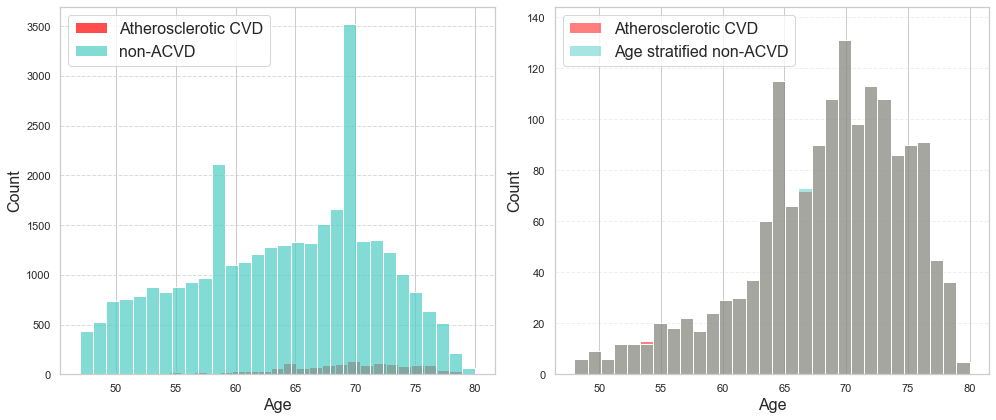

Stratified sample size: 3138
Distribution check:
 CVD
1    1569
0    1569
Name: count, dtype: int64


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Split the DataFrame into CVD and non-CVD groups
cvd_participants = df[df['CVD'] == 1]
non_cvd_participants = df[df['CVD'] == 0]

# Plot 1: Age Distribution Before Matching
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(cvd_participants['Age'], kde=False, bins=30, color='red', label='Atherosclerotic CVD', alpha=0.7)
sns.histplot(non_cvd_participants['Age'], kde=False, bins=30, color='#4ECDC4', label='non-ACVD', alpha=0.7)
#plt.title('Age Distribution Before Matching', fontsize=14)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(title="", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Function to sample non-CVD participants to match the age distribution of CVD participants
def sample_by_age_group(non_cvd_df, dist, total_samples):
    """
    Matches the age distribution of non-CVD participants to CVD participants.

    Parameters:
    - non_cvd_df: DataFrame of non-CVD participants.
    - dist: Normalized age distribution of CVD participants.
    - total_samples: Number of samples to match.

    Returns:
    - A sampled DataFrame of non-CVD participants with matched age distribution.
    """
    sampled_df = pd.DataFrame()
    for age, proportion in dist.items():
        n_samples = int(proportion * total_samples)
        age_group_df = non_cvd_df[non_cvd_df['Age'] == age]
        sampled_df = pd.concat([sampled_df, age_group_df.sample(min(n_samples, len(age_group_df)), replace=False)])
    
    # Additional sampling if fewer samples are obtained than required
    if len(sampled_df) < total_samples:
        needed = total_samples - len(sampled_df)
        additional_samples = non_cvd_df.loc[~non_cvd_df.index.isin(sampled_df.index)].sample(needed)
        sampled_df = pd.concat([sampled_df, additional_samples])
    
    return sampled_df

# Analyze the age distribution of CVD participants and normalize it
age_distribution = cvd_participants['Age'].value_counts().sort_index()
age_distribution_normalized = age_distribution / age_distribution.sum()

# Total number of CVD cases to match
n_cvd_cases = cvd_participants.shape[0]

# Apply the sampling function to match the age distribution
matched_non_cvd = sample_by_age_group(non_cvd_participants, age_distribution_normalized, n_cvd_cases)

# Combine matched non-CVD with CVD participants for comparison
stratified_non_cvd = matched_non_cvd

# Plot 2: Age Distribution After Matching
plt.subplot(1, 2, 2)
sns.histplot(cvd_participants['Age'], kde=False, bins=30, color='red', label='Atherosclerotic CVD', alpha=0.5)
sns.histplot(stratified_non_cvd['Age'], kde=False, bins=30, color='#4ECDC4', label='Age stratified non-ACVD', alpha=0.5)
#plt.title('Age Distribution After Matching', fontsize=14)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(title="", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adjust y-axis to ensure both distributions are fully visible
plt.ylim(0, max(plt.ylim()[1], cvd_participants['Age'].value_counts().max() * 1.1))


# Show the plots
plt.tight_layout()
plt.show()


stratified_df = pd.concat([cvd_participants, stratified_non_cvd])

# Verify
print("Stratified sample size:", stratified_df.shape[0])
print("Distribution check:\n", stratified_df['CVD'].value_counts())

In [21]:
triplets = [
('Appetite changes', 'CRP','CVD'), 
('Appetite changes', 'Creatinine','CVD'), 
('Appetite changes', 'Glutamine','CVD'), 
('Appetite changes', 'Glycoprotein Acetyls','CVD'), 
('Appetite changes', 'Linoleic Acid','CVD'), 
('Appetite changes', 'Monounsaturated Fatty Acids','CVD'), 
('Sleep problems', 'Acetoacetate','CVD'), 
('Sleep problems', 'Creatinine','CVD'), 
('Sleep problems', 'Monounsaturated Fatty Acids','CVD'), 
('Sleep problems', 'Tyrosine','CVD'), 
('Anhedonia', 'Creatinine','CVD'), 
('Anhedonia', 'Histidine','CVD'), 
('Suicidal ideation', 'Creatinine','CVD'), 
('Suicidal ideation', 'Linoleic Acid','CVD'), 
('Suicidal ideation', 'Omega-6 Fatty Acids','CVD'), 
('Depressed mood', 'Creatinine','CVD'), 
('Feelings of inadequacy', 'Creatinine','CVD'), 
('Feelings of inadequacy', 'Total Cholines','CVD'), 
('Fatigue', 'Glycoprotein Acetyls','CVD'), 
('Fatigue', 'Linoleic Acid','CVD'), 
('Fatigue', 'Omega-6 Fatty Acids','CVD')
            

]



In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.mediation import Mediation

def run_mediation_analysis_with_bootstrapping(df, exposure, mediator, outcome, covariates=None, n_boot=100):
    """
    Perform mediation analysis with bootstrapping to evaluate the effect of an exposure on an outcome, mediated by a mediator.
    Assumes exposure is ordinal, mediator is continuous, and outcome is binary.
    Covariates can be included to control for additional variables.
    """
    # Convert columns to numeric to avoid dtype issues
    df[exposure] = pd.to_numeric(df[exposure], errors='coerce')
    df[mediator] = pd.to_numeric(df[mediator], errors='coerce')
    df[outcome] = pd.to_numeric(df[outcome], errors='coerce')
    
    # Ensure there are no NaN values in the selected columns
    df = df.dropna(subset=[exposure, mediator, outcome] + (covariates if covariates else []))

    # Prepare the design matrices for the models
    # Outcome model predictors: exposure, mediator, and covariates
    outcome_predictors = [exposure, mediator]
    if covariates:
        outcome_predictors.extend(covariates)
    df_outcome = sm.add_constant(df[outcome_predictors])
    
    # Mediator model predictors: exposure and covariates
    mediator_predictors = [exposure]
    if covariates:
        mediator_predictors.extend(covariates)
    df_mediator = sm.add_constant(df[mediator_predictors])
    
    # Model 1: Regressing outcome on exposure, mediator, and covariates
    outcome_model = sm.Logit(df[outcome], df_outcome)  # Binary outcome logistic regression
    
    # Model 2: Regressing mediator on exposure and covariates
    mediator_model = sm.OLS(df[mediator], df_mediator)  # Continuous mediator linear regression
    
    # Configuring the mediation analysis
    med_analysis = Mediation(outcome_model, mediator_model, exposure, mediator)
    
    # Running the mediation analysis with bootstrapping
    med_result = med_analysis.fit(n_rep=n_boot, method='boot')
    
    # Print summaries for interpretation
    print(f"Running mediation analysis for Mediator: {mediator}")
    print("Indirect effect estimates with bootstrapping:")
    print(med_result.summary())
    
    return med_result

def run_multiple_mediation_analyses_with_bootstrapping(df, triplets, covariates=None, n_boot=100):
    results = {}
    for exposure, mediator, outcome in triplets:
        result = run_mediation_analysis_with_bootstrapping(df, exposure, mediator, outcome, covariates, n_boot)
        results[(exposure, mediator, outcome)] = result
    return results



# Define the three sets of covariates
covariates1 = ['Age', 'Gender']
covariates2 = ['Age', 'Gender', 'TDI', 'Alcohol', 'Smoker', 'Physical activity', 'DrugDepression']


# Store results for each covariate set
results_covariates1 = run_multiple_mediation_analyses_with_bootstrapping(df, triplets, covariates1)

In [5]:
results_covariates2 = run_multiple_mediation_analyses_with_bootstrapping(df, triplets, covariates2) 

In [6]:
covariates3 = ['Age', 'Gender', 'TDI', 'Alcohol', 'Smoker', 'Physical activity','DrugDepression',  'bmi']
results_covariates3 = run_multiple_mediation_analyses_with_bootstrapping(df, triplets, covariates3)

Plot saved as TIFF (600 DPI) to: forest_plot.tiff


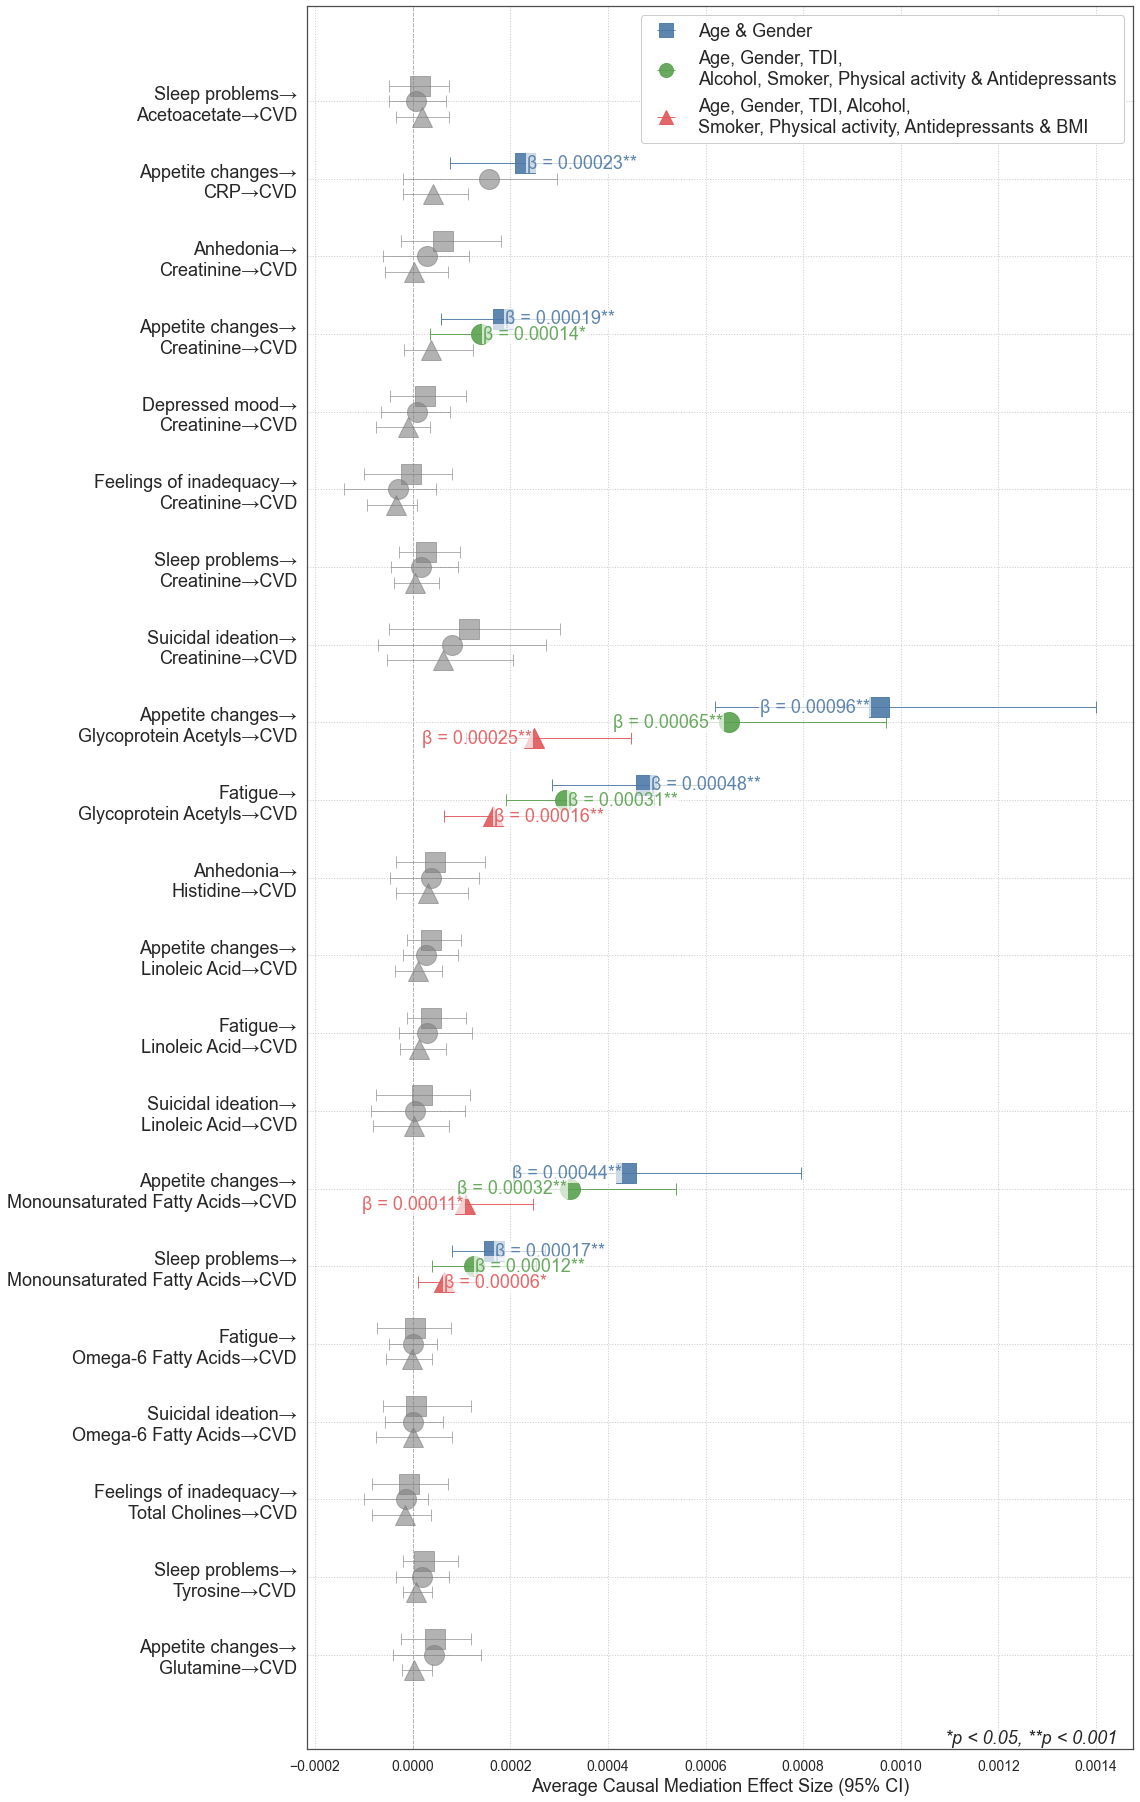

In [57]:
def plot_forest_plot_by_category_mpl(med_results_set1, med_results_set2, med_results_set3, triplets, save_path=None):
    """
    Creates an elegant forest plot for mediation results across three covariate sets,
    with distinct markers for each set (square, circle, triangle) and significance note at bottom.
    Maintains specified order of mediators with two-line y-axis labels.
    """
    # Set consistent styling
    sns.set_style("whitegrid", {'grid.linestyle': ':', 'axes.edgecolor': '0.3'})
    plt.rcParams.update({
        'font.family': 'Arial',
        'axes.titlesize': 14,
        'axes.labelsize': 14,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'savefig.dpi': 600,
        'savefig.format': 'tiff'
    })

    # Define styling for each set with distinct markers
    style_dict = {
        'set1': {'color': '#4e79a7', 'marker': 's', 'label': 'Age & Gender'},
        'set2': {'color': '#59a14f', 'marker': 'o', 'label': 'Age, Gender, TDI,\nAlcohol, Smoker, Physical activity & Antidepressants'},
        'set3': {'color': '#e15759', 'marker': '^', 'label': 'Age, Gender, TDI, Alcohol,\nSmoker, Physical activity, Antidepressants & BMI'}
    }
    
    # Define the mediator order you want to maintain
    MEDIATOR_ORDER = ['Acetoacetate', 'CRP', 'Creatinine', 'Glycoprotein Acetyls', 
                     'Histidine', 'Linoleic Acid', 'Monounsaturated Fatty Acids',
                     'Omega-6 Fatty Acids', 'Total Cholines', 'Tyrosine']
    
    # Initialize storage for all results
    all_data = {
        'set1': {'estimates': [], 'upper_cis': [], 'lower_cis': [], 'pvals': []},
        'set2': {'estimates': [], 'upper_cis': [], 'lower_cis': [], 'pvals': []},
        'set3': {'estimates': [], 'upper_cis': [], 'lower_cis': [], 'pvals': []}
    }
    
    # First collect all pathway information
    pathway_info = []
    for exposure, mediator, outcome in triplets:
        clean_exposure = "Depressed" if exposure == "Depressed.Current" else exposure
        clean_mediator = "HDL Diameter" if mediator == "Average Diameter for HDL Particles" else mediator
        # Create two-line label
        label_line1 = f"{clean_exposure}→"
        label_line2 = f"{clean_mediator}→{outcome}"
        pathway_info.append({
            'label': (label_line1, label_line2),  # Store as tuple of lines
            'mediator': clean_mediator,
            'exposure': clean_exposure,
            'outcome': outcome,
            'original_triplet': (exposure, mediator, outcome)
        })
    
    # Sort pathways by mediator order (with HDL Diameter first if present)
    def get_mediator_order(mediator):
        if mediator == "HDL Diameter":
            return -1  # Put HDL Diameter first
        try:
            return MEDIATOR_ORDER.index(mediator)
        except ValueError:
            return len(MEDIATOR_ORDER)  # Put unspecified mediators last
    
    pathway_info.sort(key=lambda x: (get_mediator_order(x['mediator']), x['exposure'], x['outcome']))
    
    # Extract the sorted pathway labels and triplets
    pathway_labels = [x['label'] for x in pathway_info]  # List of tuples (line1, line2)
    sorted_triplets = [x['original_triplet'] for x in pathway_info]
    
    # Process each sorted triplet
    for exposure, mediator, outcome in sorted_triplets:
        result_key = (exposure, mediator, outcome)
        
        # Function to extract results for a given set
        def extract_results(med_results):
            if result_key in med_results:
                result = med_results[result_key]
                summary_df = result.summary()
                
                if 'ACME (average)' in summary_df.index:
                    acme = summary_df.loc['ACME (average)', 'Estimate']
                    pval = summary_df.loc['ACME (average)', 'P-value']
                    upper = summary_df.loc['ACME (average)', 'Upper CI bound']
                    lower = summary_df.loc['ACME (average)', 'Lower CI bound']
                    return acme, pval, upper, lower
            return np.nan, np.nan, np.nan, np.nan
        
        # Extract results for each set
        for set_name, med_results in zip(['set1', 'set2', 'set3'], 
                                        [med_results_set1, med_results_set2, med_results_set3]):
            acme, pval, upper, lower = extract_results(med_results)
            all_data[set_name]['estimates'].append(acme)
            all_data[set_name]['pvals'].append(pval)
            all_data[set_name]['upper_cis'].append(upper - acme if not np.isnan(acme) else np.nan)
            all_data[set_name]['lower_cis'].append(acme - lower if not np.isnan(acme) else np.nan)
    
    # Check if there are any results to plot
    if not pathway_labels:
        print("No mediation results to plot.")
        return
    
    # Create plot with adjusted height (increased spacing)
    fig_height = max(5, len(pathway_labels) * 1.2)  # Increased from 0.8 to 1.2
    fig, ax = plt.subplots(figsize=(16, fig_height))  # <- Main change here
    
    y_pos = np.arange(len(pathway_labels)) * 1.5  # Added multiplier for spacing
    offset = 0.3  # Increased from 0.2
    
    y_offsets = {
        'set1': y_pos - offset,
        'set2': y_pos,
        'set3': y_pos + offset
    }
    
    # Define styling for non-significant results
    non_sig_style = {'color': '#7f7f7f', 'alpha': 0.6}
    
    # First plot all legend entries with original colors
    for set_name in ['set1', 'set2', 'set3']:
        ax.errorbar(
            x=[], y=[],
            xerr=[],
            fmt=style_dict[set_name]['marker'],
            color=style_dict[set_name]['color'],
            ecolor=style_dict[set_name]['color'],
            markersize=14,
            capsize=6,
            capthick=1,
            elinewidth=1,
            alpha=0.9,
            label=style_dict[set_name]['label']
        )
    
    # Now plot the actual data points
    for set_name in ['set1', 'set2', 'set3']:
        estimates = all_data[set_name]['estimates']
        upper_cis = all_data[set_name]['upper_cis']
        lower_cis = all_data[set_name]['lower_cis']
        pvals = all_data[set_name]['pvals']
        
        for i, (est, y, pval) in enumerate(zip(estimates, y_offsets[set_name], pvals)):
            if np.isnan(est):
                continue
                
            # Determine plot color based on significance
            if pval < 0.05:
                plot_color = style_dict[set_name]['color']
                plot_alpha = 0.9
            else:
                plot_color = non_sig_style['color']
                plot_alpha = non_sig_style['alpha']
            
            # Plot the point and error bars
            ax.errorbar(
                x=est,
                y=y,
                xerr=[[lower_cis[i]], [upper_cis[i]]],
                fmt=style_dict[set_name]['marker'],
                color=plot_color,
                ecolor=plot_color,
                markersize=20,
                capsize=6,
                capthick=1,
                elinewidth=1,
                alpha=plot_alpha
            )
            
            # In the data points plotting section, replace the annotation code with:

            if not np.isnan(est) and pval < 0.05:
                if pval < 0.001:
                    sig_symbol = "**"
                else:
                    sig_symbol = "*"

                # Calculate text position with alternating alignment
                text_x = est
                text_y = y

                # Alternate alignment based on index
                if i % 2 == 0:
                    ha_pos = 'right'
                    text_x = est * 0.98  # Slight nudge left for right-aligned
                else:
                    ha_pos = 'left'
                    text_x = est * 1.02  # Slight nudge right for left-aligned

                ax.text(
                    text_x, text_y,
                    f"β = {est:.5f}{sig_symbol}",
                    ha=ha_pos,
                    va='center',  # Changed from 'bottom' to 'center'
                    fontsize=18,
                    color=style_dict[set_name]['color'],
                    alpha=0.9,
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1)
                )
 
        # Add legend with adjusted position
        # [All previous code unchanged until legend section]
    
    # Add legend with adjusted position (inside plot)
    ax.legend(loc='upper right', fontsize=18, bbox_to_anchor=(1, 1),
              borderaxespad=0.5, frameon=True, framealpha=1)
   

    plt.subplots_adjust(left=0.3, right=0.8, top=0.95, bottom=0.1)
    
    # Customize axes with two-line labels
    ax.set_yticks(y_pos)
    yticklabels = ['{}\n{}'.format(line1, line2) for line1, line2 in pathway_labels]
    ax.set_yticklabels(yticklabels, fontsize=18, ha='right', ma='right')
    ax.invert_yaxis()
    ax.set_xlabel('Average Causal Mediation Effect Size (95% CI)', fontsize=18)
    ax.axvline(0, color='gray', linestyle='--', linewidth=1, alpha=0.5)
      # Add significance note at bottom right with adjusted position
    ax.text(0.98, 0.001, "*p < 0.05, **p < 0.001", transform=ax.transAxes,
            ha='right', va='bottom', fontsize=18, style='italic')
    
    # Adjust plot margins
   # plt.subplots_adjust(left=0.4, right=0.85, top=0.95, bottom=0.1)
    
    # [Rest of the function remains unchanged]
    # Final tight layout
    plt.tight_layout()
    
    # Save as TIFF with 600 DPI if path is provided
    if save_path:
        plt.savefig(save_path, dpi=600, format='tiff', bbox_inches='tight', pil_kwargs={'compression': 'tiff_lzw'})
        print(f"Plot saved as TIFF (600 DPI) to: {save_path}")
    
    plt.show()
    
plot_forest_plot_by_category_mpl(
    results_covariates1, 
    results_covariates2, 
    results_covariates3, 
    triplets, 
    save_path="forest_plot.tiff" 
)